In [1]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
import numpy as np
import xclim

import fileio

In [2]:
awap_file = '/g/data/xv83/dbi599/pr_awap_1900-2020_A-DEC-mean_wheat-sheep-mean.zarr.zip'

In [3]:
cafe_file = '/g/data/xv83/dbi599/pr_cafe-c5-d60-pX-f6_19900501-20201101_A-DEC-mean_wheat-sheep-mean.zarr.zip'
cafe_bc_file = '/g/data/xv83/dbi599/pr_cafe-c5-d60-pX-f6_19900501-20201101_A-DEC-mean_wheat-sheep-mean_bias-corrected-awap-additive.zarr.zip'

In [4]:
awap_ds = fileio.open_file(awap_file)

In [5]:
awap_ds

<xarray.Dataset>
Dimensions:  (region: 4, time: 121)
Coordinates:
  * region   (region) <U10 'south-west' 'south-east' 'north-east' 'all'
  * time     (time) object 1900-01-01 09:00:00 ... 2020-01-02 09:00:00
Data variables:
    pr       (time, region) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>
Attributes:
    history:  Mon Aug 09 14:19:09 2021: /g/data/e14/dbi599/miniconda3/envs/un...

In [13]:
awap_ds['pr']

<xarray.DataArray 'pr' (time: 121, region: 4)>
dask.array<open_dataset-fc23324ab6e175584fe8af030a4cbf25pr, shape=(121, 4), dtype=float64, chunksize=(1, 4), chunktype=numpy.ndarray>
Coordinates:
  * region   (region) <U10 'south-west' 'south-east' 'north-east' 'all'
  * time     (time) object 1900-01-01 09:00:00 ... 2020-01-02 09:00:00
Attributes:
    analysis_time:                 2010-10-23 14:49:46 UTC
    analysis_version_number:       3.01
    cell_methods:                  time: sum
    frequency:                     daily
    grid_mapping:                  crs
    length_scale_for_analysis:     80.0
    long_name:                     Daily precipitation
    number_of_stations_reporting:  2757
    source:                        Interpolated surface observations
    standard_name:                 lwe_thickness_of_precipitation_amount
    units:                         mm d-1
    valid_range:                   [-1.0, 100000.0]

TODO: Change long name and standard name.

Units notes:

0. Start with gridded precipitation flux with units kg m-2 s-1
1. Take the area weighted spatial mean for each region (units still kg m-2 s-1) (and perhaps also an "all" region which includes SW, SE and NE)
2. Calculate the annual mean (still kg m-2 s-1)

then either 

3. Multiply by 86400 * 365 = 31536000 to get mm/year (i.e. average rainfall rate across the region)

or 

3. Multiply by 31536000 and the area of the region to get kg/year

The second option for step 3 could be used for a stacked bar chart of the total amount of rain falling across all three regions (the first option couldn't because it hasn't accounted for the different size of each region).

In [6]:
awap_ds['pr'].attrs['units']

'mm d-1'

In [7]:
awap_ds['pr'] = awap_ds['pr'] * 365
awap_ds['pr'].attrs['units'] = 'mm yr-1'

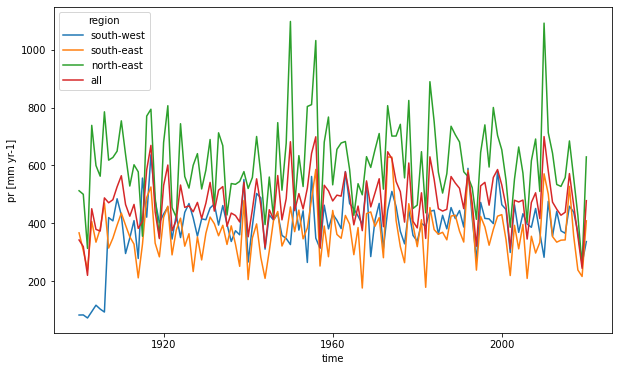

In [8]:
fig = plt.figure(figsize=[10, 6])

awap_ds['pr'].plot(hue='region')

plt.show()

In [9]:
years = awap_ds['time'].dt.year.values
awap_df = pd.DataFrame(index=years)

awap_df['south-west'] = awap_ds['pr'].sel(region='south-west').values
awap_df['south-east'] = awap_ds['pr'].sel(region='south-east').values
awap_df['north-east'] = awap_ds['pr'].sel(region='north-east').values
awap_df['all'] = awap_ds['pr'].sel(region='all').values

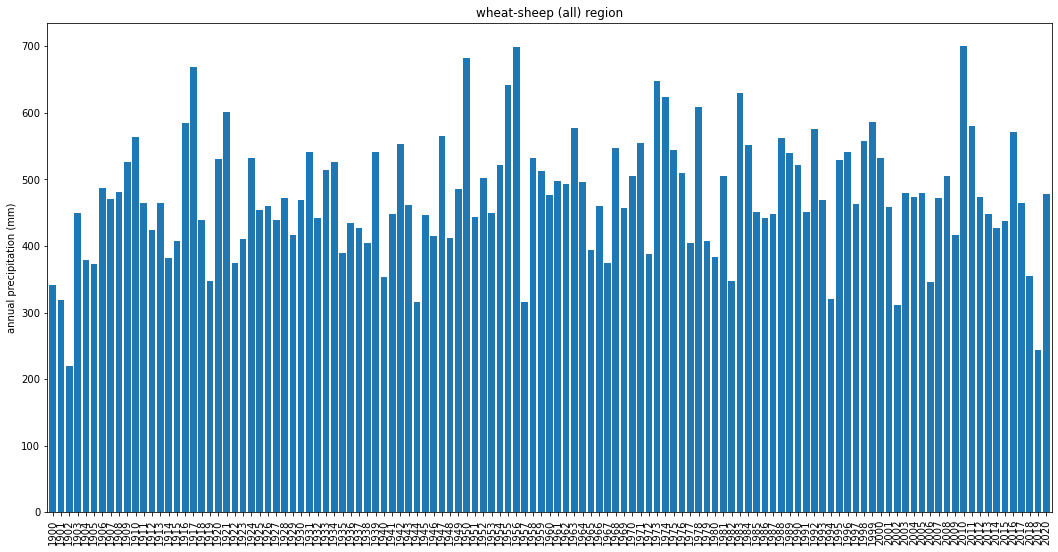

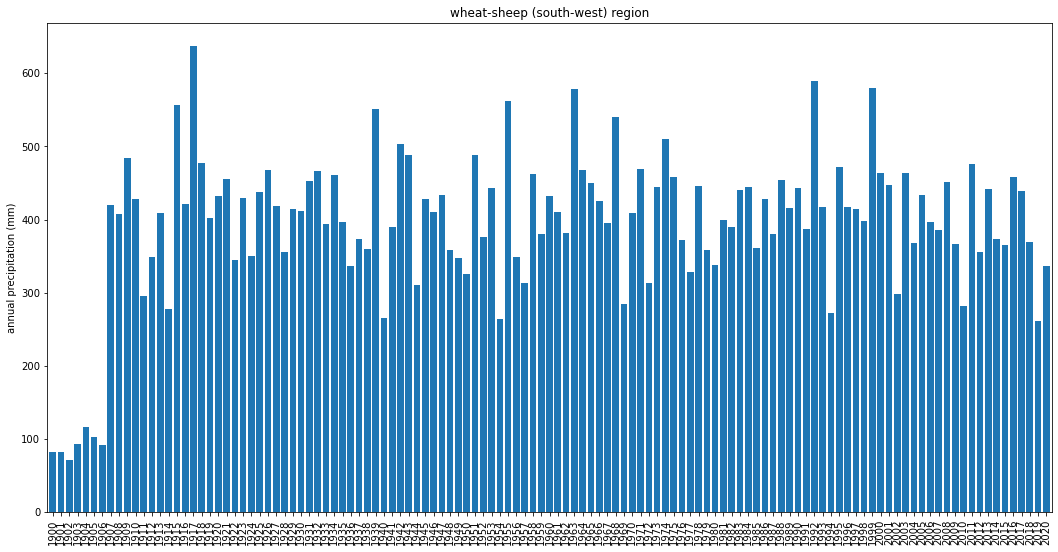

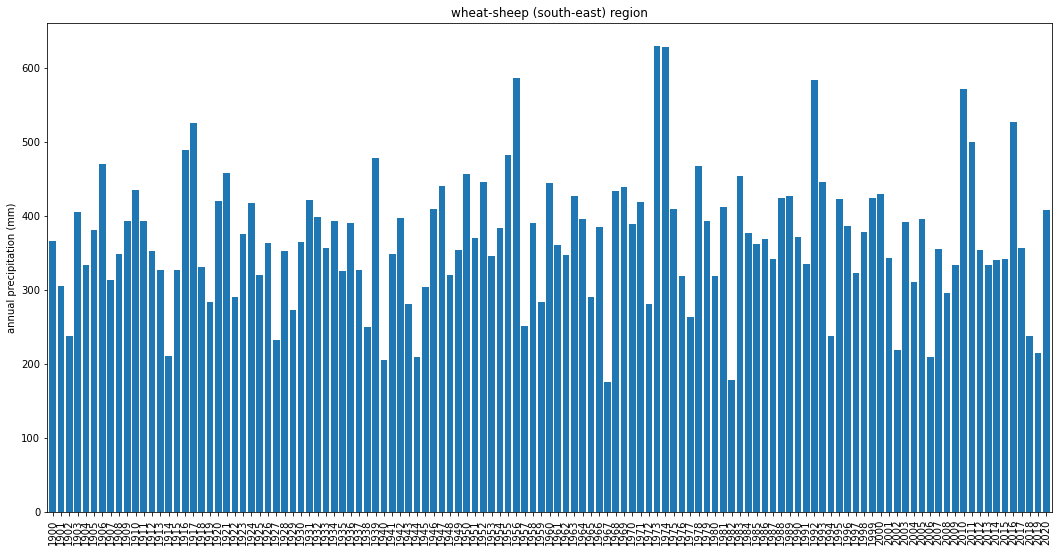

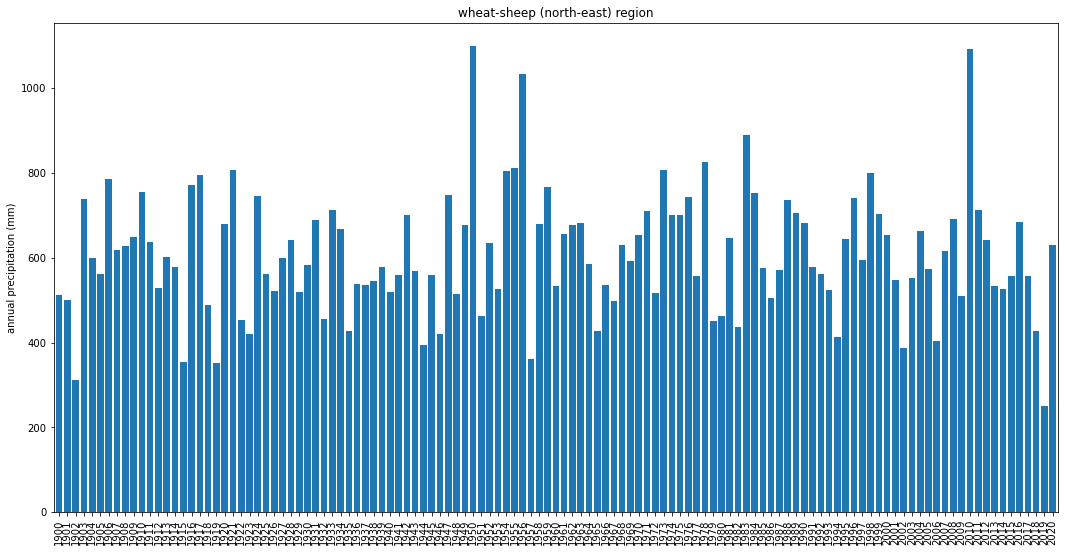

In [10]:
for region in ['all', 'south-west', 'south-east', 'north-east']:
    awap_df[region].plot.bar(figsize=[18, 9], width=0.8)
    plt.ylabel('annual precipitation (mm)')
    plt.title(f'wheat-sheep ({region}) region')
    #plt.savefig(f'/g/data/xv83/dbi599/wheat_sheep_precip_{region}.png', bbox_inches='tight', facecolor='white')
    plt.show()

In [11]:
cafe_ds = fileio.open_file(cafe_file)
cafe_bc_ds = fileio.open_file(cafe_bc_file)

In [12]:
cafe_bc_ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, lead_time: 9, region: 4)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1991-05-01 00:00:00 ... 2021-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
  * region     (region) <U10 'south-west' 'south-east' 'north-east' 'all'
    time       (lead_time, init_date) object dask.array<chunksize=(9, 62), meta=np.ndarray>
Data variables:
    pr         (init_date, lead_time, ensemble, region) float64 dask.array<chunksize=(1, 9, 96, 4), meta=np.ndarray>
Attributes:
    history:  Mon Aug 09 14:20:03 2021: /g/data/e14/dbi599/miniconda3/envs/un...

In [23]:
cafe_ds['pr']

<xarray.DataArray 'pr' (init_date: 62, lead_time: 9, ensemble: 96, region: 4)>
dask.array<open_dataset-fa5293ed37cbe5118e122cb427fb6821pr, shape=(62, 9, 96, 4), dtype=float64, chunksize=(1, 9, 96, 4), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1991-05-01 00:00:00 ... 2021-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
  * region     (region) <U10 'south-west' 'south-east' 'north-east' 'all'
    time       (lead_time, init_date) object dask.array<chunksize=(9, 62), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          mm d-1

In [24]:
cafe_bc_ds['pr']

<xarray.DataArray 'pr' (init_date: 62, lead_time: 9, ensemble: 96, region: 4)>
dask.array<open_dataset-3eb7ced3d1f0071311928f4afd0469e8pr, shape=(62, 9, 96, 4), dtype=float64, chunksize=(1, 9, 96, 4), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1991-05-01 00:00:00 ... 2021-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
  * region     (region) <U10 'south-west' 'south-east' 'north-east' 'all'
    time       (lead_time, init_date) object dask.array<chunksize=(9, 62), meta=np.ndarray>
Attributes:
    bias_correction_method:  additive
    bias_correction_period:  1990-01-01-2019-12-31
    cell_methods:            time: mean
    interp_method:           conserve_order1
    long_name:               Total precipitation rate
    time_avg_info:           average_T1,average_T2,average_DT
    units:                   mm d-1

In [55]:
62 * 9 * 96

53568

In [52]:
cafe_ds['pr'].attrs['units']

'mm d-1'

In [53]:
cafe_bc_ds['pr'].attrs['units']

'mm d-1'

In [13]:
cafe_ds['pr'] = cafe_ds['pr'] * 365
cafe_ds['pr'].attrs['units'] = 'mm yr-1'

cafe_bc_ds['pr'] = cafe_bc_ds['pr'] * 365
cafe_bc_ds['pr'].attrs['units'] = 'mm yr-1'

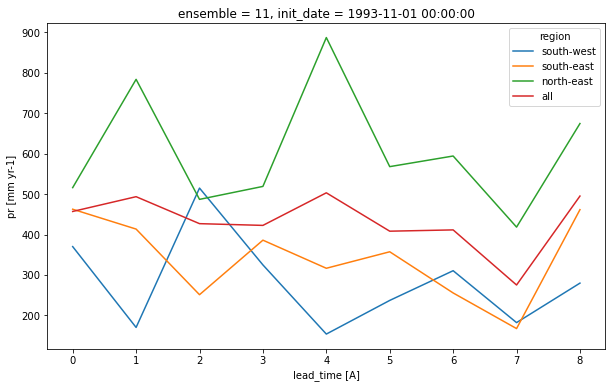

In [14]:
fig = plt.figure(figsize=[10, 6])

cafe_ds.isel(ensemble=10, init_date=5)['pr'].plot(hue='region')

plt.show()

In [17]:
awap_ds.sel(time=slice('1910-01-01', '2020-12-31'))

<xarray.Dataset>
Dimensions:  (region: 4, time: 111)
Coordinates:
  * region   (region) <U10 'south-west' 'south-east' 'north-east' 'all'
  * time     (time) object 1910-01-01 09:00:00 ... 2020-01-02 09:00:00
Data variables:
    pr       (time, region) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>
Attributes:
    history:  Mon Aug 09 14:19:09 2021: /g/data/e14/dbi599/miniconda3/envs/un...

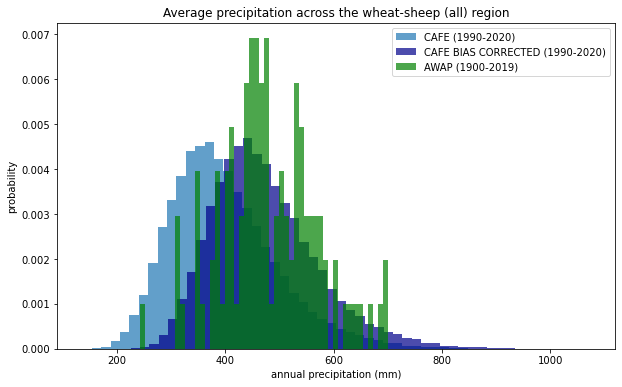

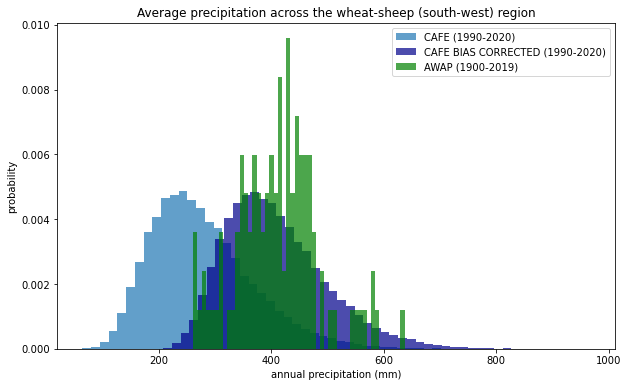

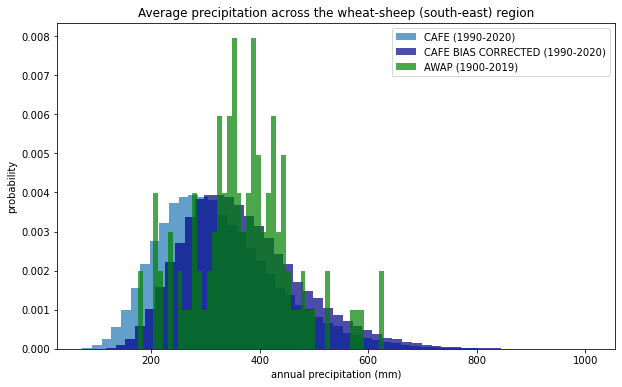

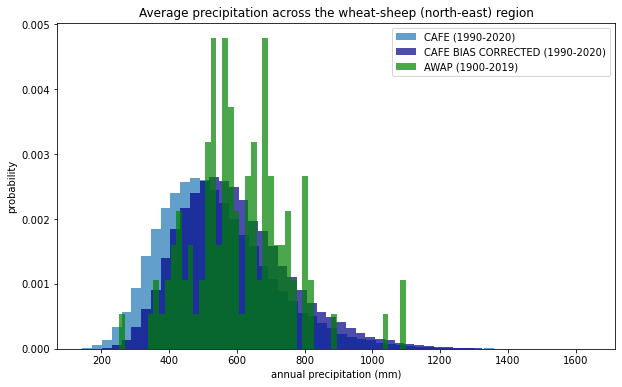

In [18]:
for region in ['all', 'south-west', 'south-east', 'north-east']:
    fig = plt.figure(figsize=[10, 6])
    cafe_ds.sel(region=region)['pr'].plot.hist(bins=50, density=True, label='CAFE (1990-2020)', alpha=0.7)
    cafe_bc_ds.sel(region=region)['pr'].plot.hist(bins=50, density=True, label='CAFE BIAS CORRECTED (1990-2020)', facecolor='darkblue', alpha=0.7)
    awap_ds.sel(region=region, time=slice('1910-01-01', '2020-12-31'))['pr'].plot.hist(bins=50, density=True, label='AWAP (1900-2019)', facecolor='green', alpha=0.7)
    plt.xlabel('annual precipitation (mm)')
    plt.ylabel('probability')
    plt.title(f'Average precipitation across the wheat-sheep ({region}) region')
    plt.legend()
    #plt.savefig(f'/g/data/xv83/dbi599/wheat_sheep_precip_histogram_{region}.png', bbox_inches='tight', facecolor='white')
    plt.show()

In [29]:
data = cafe_bc_ds.sel(region='all')['pr'].stack({'sample': ['ensemble', 'init_date', 'lead_time']}).compute()
data = np.sort(data, axis=None)
exceedance = 1.-np.arange(1.,len(data) + 1.)/len(data)

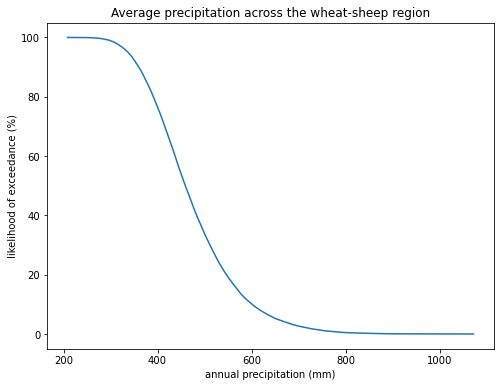

In [30]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot()
ax.plot(data, exceedance * 100)
ax.set_title('Average precipitation across the wheat-sheep region')
ax.set_ylabel('likelihood of exceedance (%)')
ax.set_xlabel('annual precipitation (mm)')
plt.show()

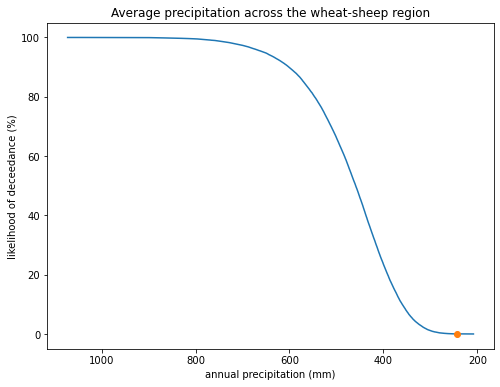

In [48]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot()
ax.plot(data, 100 - (exceedance * 100))
ax.invert_xaxis()
ax.set_title('Average precipitation across the wheat-sheep region')
ax.set_ylabel('likelihood of deceedance (%)')
ax.set_xlabel('annual precipitation (mm)')
ax.plot(244.0081797, 0, 'o')
plt.show()

In [43]:
awap_vals = awap_ds.sel(time=slice('1910-01-01', '2020-12-31'), region='all')['pr'].values

In [46]:
np.sort(awap_vals)

array([244.0081797 , 311.67872212, 315.29131575, 316.01492757,
       320.46657381, 345.18956946, 346.8413552 , 347.41621516,
       352.99347567, 354.9110775 , 374.16682969, 374.29291585,
       382.11623792, 383.81005731, 388.01515534, 389.36656664,
       394.38280155, 403.80048037, 404.42543788, 406.74664593,
       406.83968225, 410.19885814, 411.67978747, 414.28298825,
       416.01819887, 416.54052648, 424.32034182, 426.7418327 ,
       427.67060512, 435.13673294, 438.00274515, 439.29246765,
       439.68374948, 441.97026234, 442.11466742, 443.57949066,
       446.68341876, 447.6013562 , 448.13572303, 448.52508007,
       449.47319474, 450.30354094, 450.56960301, 454.78913818,
       456.5425864 , 458.91500592, 459.44237073, 459.93623473,
       461.30527416, 462.49390328, 463.86597956, 464.86829487,
       465.08405678, 469.20633409, 469.46292461, 471.79779625,
       472.08560604, 473.21282266, 473.57641886, 477.06780909,
       478.05048338, 479.56725936, 480.10052837, 485.13